# Step 2: Setting Up Our Synthetic Data Environment
Create a dataset to demonstrate stacking's capabilities.

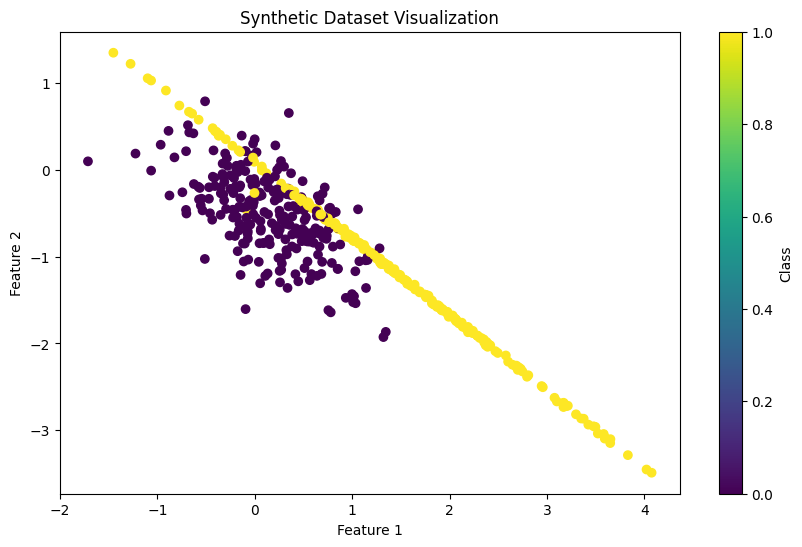

In [ ]:
# Set up our environment for ensemble stacking

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=4,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Visualize the first two features
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Synthetic Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

# Step 3: Train Base Models
Create and train our diverse set of base models.


In [ ]:
# Initialize base models
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
log_reg = LogisticRegression(random_state=42)

# Train base models
base_models = {
    'Decision Tree': tree_clf,
    'SVM': svm_clf,
    'Logistic Regression': log_reg
}

# Train and evaluate each base model
base_accuracies = {}
for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    base_accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {base_accuracies[name]:.3f}")

Decision Tree Accuracy: 0.870
SVM Accuracy: 0.870
Logistic Regression Accuracy: 0.820



# Step 4: Implementing the StackingClassifier
Combine our base models using stacking.

In [ ]:
# Define and train stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('tree', tree_clf),
        ('svm', svm_clf),
        ('log_reg', log_reg)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42)),
                               ('log_reg',
                                LogisticRegression(random_state=42))],
                   final_estimator=LogisticRegression())

# Step 5: Evaluate Model Performance
Compare stacking performance with base models.


Stacking Model Accuracy: 0.870


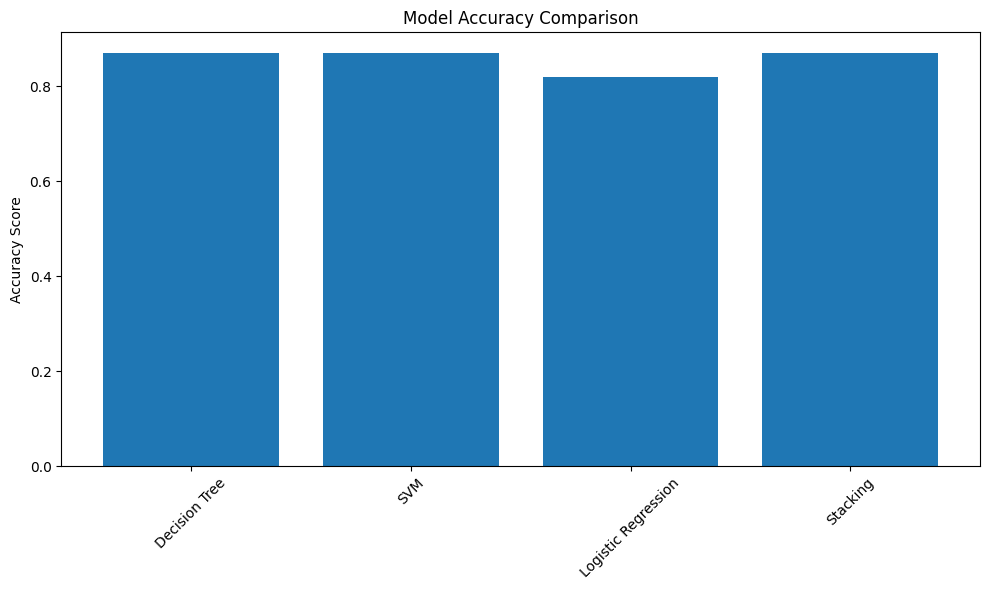

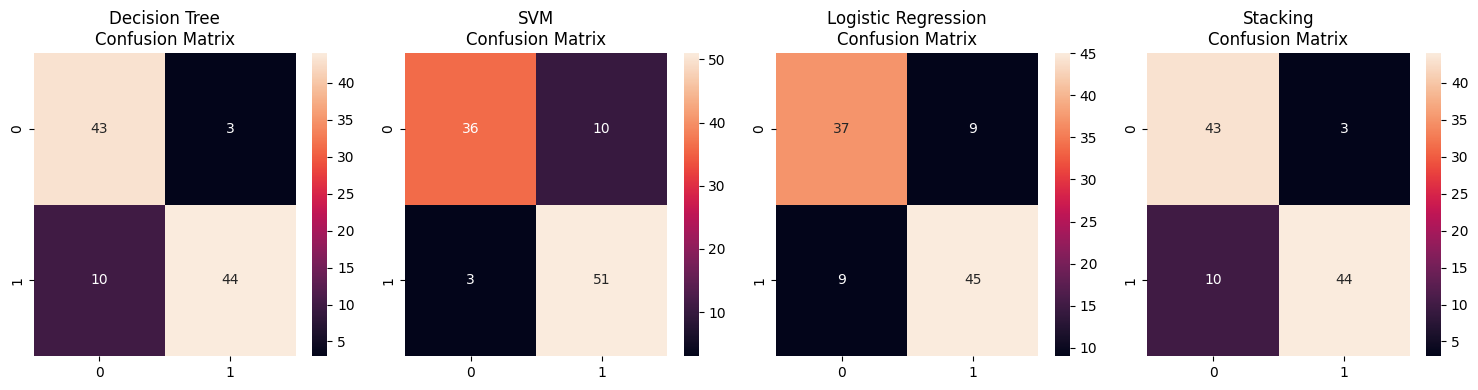

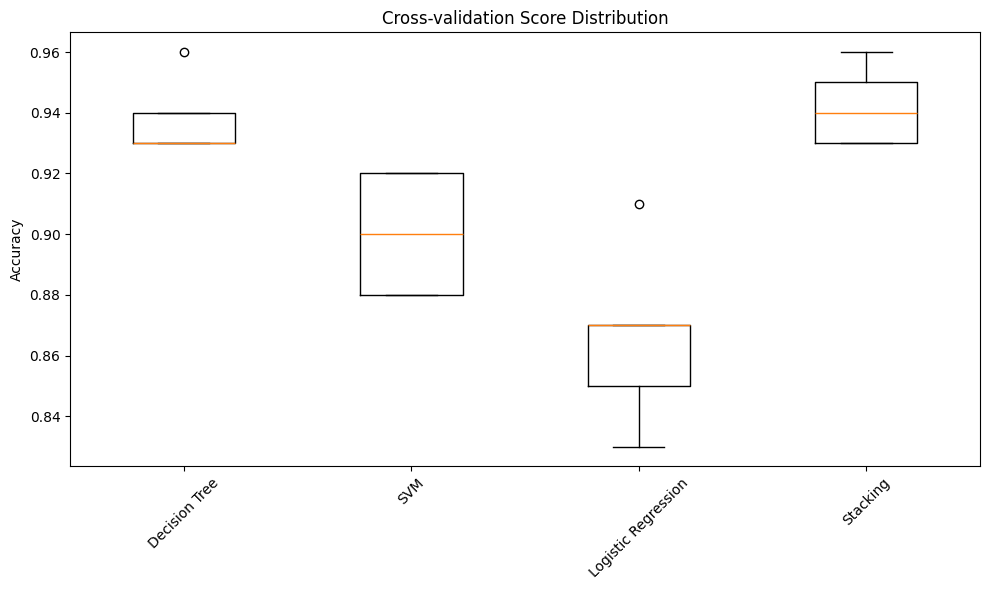

In [ ]:
# Evaluate stacking classifier
y_pred_stack = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)
print(f"\nStacking Model Accuracy: {stacking_accuracy:.3f}")

# Visualize model comparison
# =====================================

# Compare accuracies
plt.figure(figsize=(10, 6))
accuracies = {**base_accuracies, 'Stacking': stacking_accuracy}
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize confusion matrices
# =====================================

def plot_confusion_matrices(models, X_test, y_test):
    n_models = len(models)
    fig, axes = plt.subplots(1, n_models, figsize=(15, 4))

    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', ax=ax)
        ax.set_title(f'{name}\nConfusion Matrix')

    plt.tight_layout()
    plt.show()

models = {**base_models, 'Stacking': stacking_clf}
plot_confusion_matrices(models, X_test, y_test)

# Cross-validation comparison
# =====================================

from sklearn.model_selection import cross_val_score

def plot_cv_comparison(models, X, y):
    cv_scores = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5)
        cv_scores[name] = scores

    plt.figure(figsize=(10, 6))
    plt.boxplot([scores for scores in cv_scores.values()], tick_labels=cv_scores.keys())
    plt.title('Cross-validation Score Distribution')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_cv_comparison(models, X, y)